## Import package

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers, losses
import random

## Download data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Preprocess

In [3]:
TRAIN_NUM = int(len(x_train)*0.8)

trainImage, trainLabel = x_train[: TRAIN_NUM], y_train[: TRAIN_NUM]
validImage, validLabel = x_train[TRAIN_NUM: ], y_train[TRAIN_NUM: ]
trainImage = (trainImage[:, :, :, np.newaxis]/255. - 0.5) * 2
validImage = (validImage[:, :, :, np.newaxis]/255. - 0.5) * 2
testImage = (x_test[:, :, :, np.newaxis]/255. - 0.5) * 2
testLabel = y_test
imageShape = trainImage[0].shape

print(trainImage.shape)
print(validImage.shape)
print(testImage.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


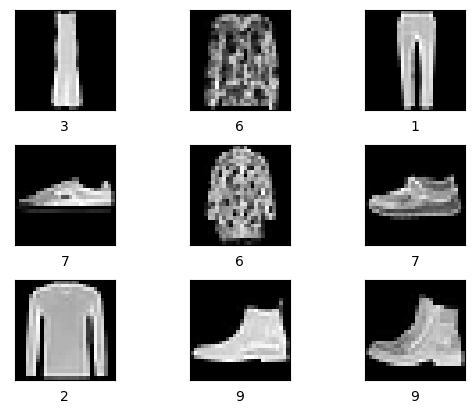

In [4]:
#        0           1           2         3        4        5        6         7        8          9
# 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
plt.subplots_adjust(hspace=0.35)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    n = random.randint(0, TRAIN_NUM)
    plt.imshow(trainImage[n], cmap='gray')
    plt.xlabel(trainLabel[n])

## Create Model

In [5]:
model = Sequential()
model.add(layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=imageShape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

## Train model

In [6]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(trainImage, trainLabel, epochs=15, batch_size=64, validation_data=(validImage, validLabel))

Epoch 1/15
750/750 [==============================] - 5s 3ms/step - loss: 0.5353 - accuracy: 0.8206 - val_loss: 0.3487 - val_accuracy: 0.8763
Epoch 2/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3028 - accuracy: 0.8905 - val_loss: 0.2804 - val_accuracy: 0.8981
Epoch 3/15
750/750 [==============================] - 2s 3ms/step - loss: 0.2498 - accuracy: 0.9102 - val_loss: 0.2664 - val_accuracy: 0.9028
Epoch 4/15
750/750 [==============================] - 2s 3ms/step - loss: 0.2148 - accuracy: 0.9219 - val_loss: 0.2462 - val_accuracy: 0.9104
Epoch 5/15
750/750 [==============================] - 2s 3ms/step - loss: 0.1876 - accuracy: 0.9314 - val_loss: 0.2224 - val_accuracy: 0.9186
Epoch 6/15
750/750 [==============================] - 2s 3ms/step - loss: 0.1672 - accuracy: 0.9392 - val_loss: 0.2394 - val_accuracy: 0.9102
Epoch 7/15
750/750 [==============================] - 2s 3ms/step - loss: 0.1442 - accuracy: 0.9484 - val_loss: 0.2314 - val_accuracy: 0.9162
Epoch 

## Visualize

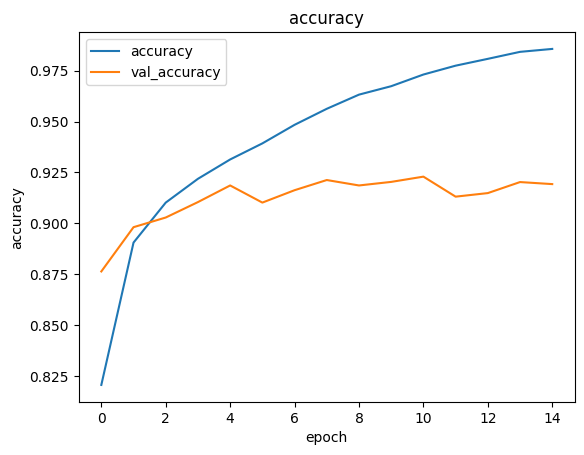

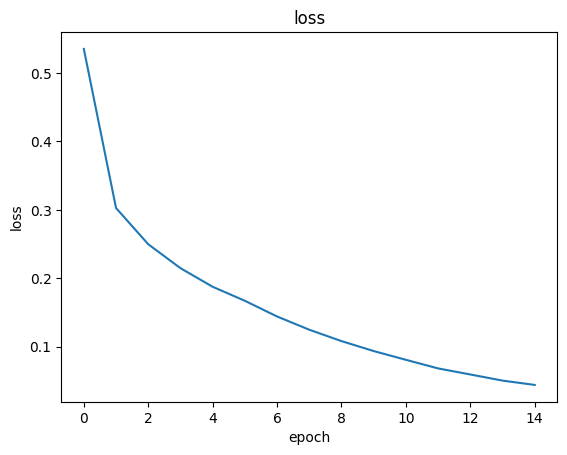

In [7]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')

plt.figure()
plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

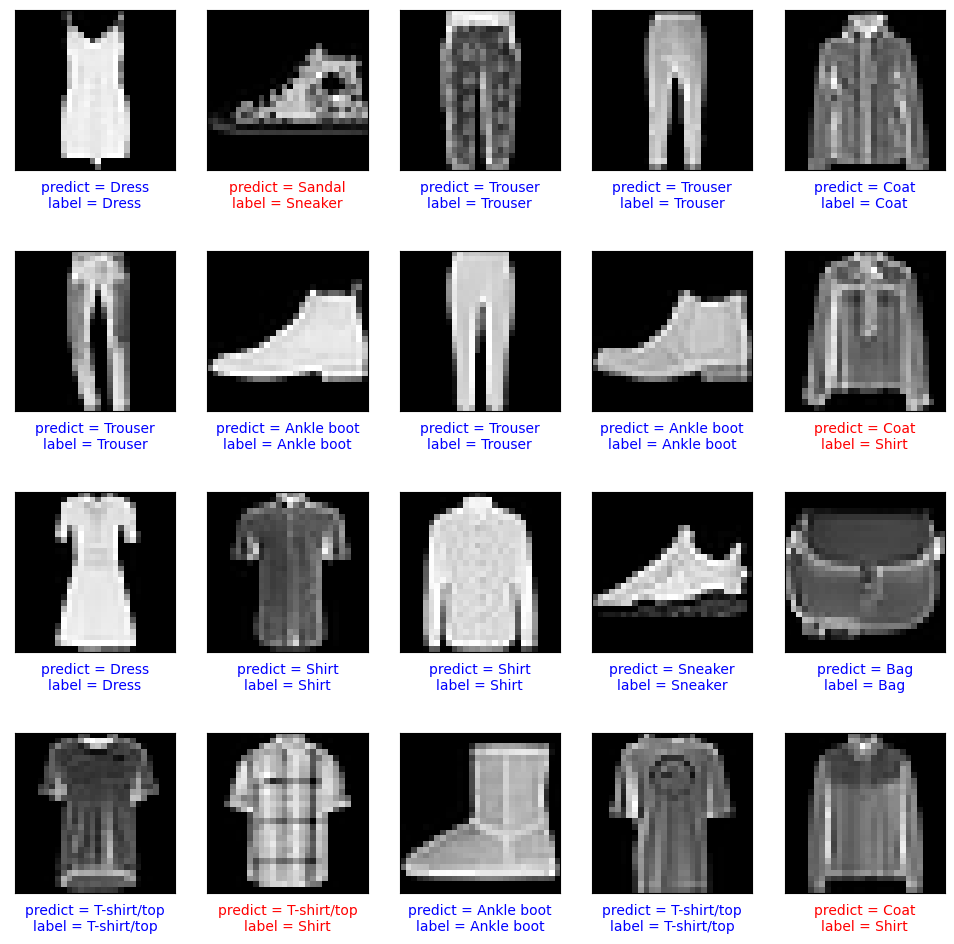

In [8]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predict = model.predict(testImage)
prediction = np.argmax(predict, axis=1)

plt.figure(figsize=(12, 12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    n = random.randint(0, 10000)
    plt.imshow(testImage[n], cmap='gray')
    xlabel = f'predict = {labels[prediction[n]]}\nlabel = {labels[testLabel[n]]}'
    if (prediction[n] == testLabel[n]):
        plt.xlabel(xlabel).set_color('b')
    else:
        plt.xlabel(xlabel).set_color('r')
plt.show()